# Goal of workbook is to learn about time series forecasting
### Taking a "ice cream" shop approach: sampling many different flavors
working from [https://otexts.com/fpp3/index.html](Hyndamn's Forecasting Principles and Practice)
goal is to also work through [SKforecast](https://cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn)
and [SciKitLearn](https://scikit-learn.org/stable/)

## Section 1: Get some Data
### SPP Day Ahead LMPs
example [Gridstatus LMP Data](https://docs.gridstatus.io/en/latest/Examples/spp/LMP%20Data.html)

In [2]:
import pandas as pd

In [ ]:
import gridstatus

In [3]:
iso = gridstatus.SPP()

Coal Units and Wind Units for a variety of pricing, wind units should have more negative prices

In [5]:
locations = [
"WR.LEC.5",
"WR.JEC.1",
"KCPLIATANUNIAT1",
"KCPLLACYGNEUNLAC1",
"MPS.ROCKCREEK",
"SECI_CIMARRON",
"SECI.KCPS.SPEARVILLE"]

Pull three years of data to start

In [ ]:
df_main=iso.get_lmp(date="2023-01-01", end = "2024-01-01", market="DAY_AHEAD_HOURLY")

In [ ]:
#df_21=iso.get_lmp(date="2021-01-01",market="DAY_AHEAD_HOURLY")

In [9]:
df_main=df_main.loc[df_main['Location'].isin(locations)]

In [ ]:
df_main.head()

In [ ]:
df_main.tail()

In [ ]:
df_main.reset_index(drop=True)

In [23]:
df_main.drop(columns=["Interval Start", "Interval End", "Market", "Location Type", "PNode", "Energy", "Congestion", "Loss"], inplace=True)

In [27]:
df_main.shape

(113880, 3)

In [ ]:
df_main.head(30)

In [ ]:
df_main.tail(30)

In [30]:
df_main.reset_index(drop=True)

,Time,Location,LMP
0,2023-01-01 00:00:00-06:00,KCPLIATANUNIAT1,23.1615
1,2023-01-01 00:00:00-06:00,KCPLIATANUNIAT2,23.1615
2,2023-01-01 00:00:00-06:00,KCPLLACYGNEUNLAC1,22.2436
3,2023-01-01 00:00:00-06:00,KCPLLACYGNEUNLAC2,22.2436
4,2023-01-01 00:00:00-06:00,MPS.ROCKCREEK,22.8559
...,...,...,...
113875,2023-12-31 23:00:00-06:00,WR.JEC.1,22.7419
113876,2023-12-31 23:00:00-06:00,WR.JEC.2,22.8056
113877,2023-12-31 23:00:00-06:00,WR.JEC.3,22.9064
113878,2023-12-31 23:00:00-06:00,WR.LEC.4,23.1310


In [47]:
df_mainPivot = df_main.pivot(index = "Time", columns = "Location", values="LMP")

In [48]:
df_mainPivot.head()

Location,KCPLIATANUNIAT1,KCPLIATANUNIAT2,KCPLLACYGNEUNLAC1,KCPLLACYGNEUNLAC2,MPS.ROCKCREEK,SECI.KCPS.CIMARRON,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.JEC.2,WR.JEC.3,WR.LEC.4,WR.LEC.5
Time,,,,,,,,,,,,,
2023-01-01 00:00:00-06:00,23.1615,23.1615,22.2436,22.2436,22.8559,17.3592,18.0405,17.3592,17.6536,17.0317,17.1019,24.3936,24.0183
2023-01-01 01:00:00-06:00,20.5651,20.5651,19.7729,19.7729,20.4925,17.1675,17.3628,17.1675,17.5015,17.2527,17.3181,20.9549,20.8391
2023-01-01 02:00:00-06:00,22.1197,22.1197,21.1474,21.1474,21.9965,18.5753,18.7383,18.5753,17.5991,17.1104,17.1791,23.0484,22.7795
2023-01-01 03:00:00-06:00,21.1908,21.1908,20.2595,20.2595,21.1168,18.0899,18.1809,18.0899,17.4774,17.1104,17.1787,21.9023,21.6705
2023-01-01 04:00:00-06:00,21.9438,21.9438,20.9770,20.9770,21.7675,18.7861,18.8693,18.7861,17.4918,17.0049,17.0748,22.8965,22.6176


In [50]:
df_mainPivot.reset_index()

Location,Time,KCPLIATANUNIAT1,KCPLIATANUNIAT2,KCPLLACYGNEUNLAC1,KCPLLACYGNEUNLAC2,MPS.ROCKCREEK,SECI.KCPS.CIMARRON,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.JEC.2,WR.JEC.3,WR.LEC.4,WR.LEC.5
0,2023-01-01 00:00:00-06:00,23.1615,23.1615,22.2436,22.2436,22.8559,17.3592,18.0405,17.3592,17.6536,17.0317,17.1019,24.3936,24.0183
1,2023-01-01 01:00:00-06:00,20.5651,20.5651,19.7729,19.7729,20.4925,17.1675,17.3628,17.1675,17.5015,17.2527,17.3181,20.9549,20.8391
2,2023-01-01 02:00:00-06:00,22.1197,22.1197,21.1474,21.1474,21.9965,18.5753,18.7383,18.5753,17.5991,17.1104,17.1791,23.0484,22.7795
3,2023-01-01 03:00:00-06:00,21.1908,21.1908,20.2595,20.2595,21.1168,18.0899,18.1809,18.0899,17.4774,17.1104,17.1787,21.9023,21.6705
4,2023-01-01 04:00:00-06:00,21.9438,21.9438,20.9770,20.9770,21.7675,18.7861,18.8693,18.7861,17.4918,17.0049,17.0748,22.8965,22.6176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00-06:00,25.1442,25.1442,24.8819,24.8819,16.9229,22.7914,23.1359,22.7914,23.9770,24.0462,24.1494,24.7306,24.8162
8756,2023-12-31 20:00:00-06:00,25.0533,25.0533,24.5311,24.5311,24.7022,23.3450,23.6479,23.3450,23.8784,23.9503,24.0563,24.4739,24.5689
8757,2023-12-31 21:00:00-06:00,24.9286,24.9286,23.9259,23.9259,24.8643,23.3814,23.6222,23.3814,23.6232,23.6966,23.8023,24.2121,24.2862
8758,2023-12-31 22:00:00-06:00,26.5195,26.5195,25.5493,25.5493,26.4230,25.4710,25.6972,25.4710,25.2807,25.3562,25.4686,25.8145,25.9067


In [51]:
df_mainPivot.index

DatetimeIndex(['2023-01-01 00:00:00-06:00', '2023-01-01 01:00:00-06:00',
               '2023-01-01 02:00:00-06:00', '2023-01-01 03:00:00-06:00',
               '2023-01-01 04:00:00-06:00', '2023-01-01 05:00:00-06:00',
               '2023-01-01 06:00:00-06:00', '2023-01-01 07:00:00-06:00',
               '2023-01-01 08:00:00-06:00', '2023-01-01 09:00:00-06:00',
               ...
               '2023-12-31 14:00:00-06:00', '2023-12-31 15:00:00-06:00',
               '2023-12-31 16:00:00-06:00', '2023-12-31 17:00:00-06:00',
               '2023-12-31 18:00:00-06:00', '2023-12-31 19:00:00-06:00',
               '2023-12-31 20:00:00-06:00', '2023-12-31 21:00:00-06:00',
               '2023-12-31 22:00:00-06:00', '2023-12-31 23:00:00-06:00'],
              dtype='datetime64[ns, US/Central]', name='Time', length=8760, freq=None)

In [52]:
df_mainPivot.columns

Index(['KCPLIATANUNIAT1', 'KCPLIATANUNIAT2', 'KCPLLACYGNEUNLAC1',
       'KCPLLACYGNEUNLAC2', 'MPS.ROCKCREEK', 'SECI.KCPS.CIMARRON',
       'SECI.KCPS.SPEARVILLE', 'SECI_CIMARRON', 'WR.JEC.1', 'WR.JEC.2',
       'WR.JEC.3', 'WR.LEC.4', 'WR.LEC.5'],
      dtype='object', name='Location')

In [53]:
df_mainPivot.columns.name=''

In [54]:
df_mainPivot.head()

,KCPLIATANUNIAT1,KCPLIATANUNIAT2,KCPLLACYGNEUNLAC1,KCPLLACYGNEUNLAC2,MPS.ROCKCREEK,SECI.KCPS.CIMARRON,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.JEC.2,WR.JEC.3,WR.LEC.4,WR.LEC.5
Time,,,,,,,,,,,,,
2023-01-01 00:00:00-06:00,23.1615,23.1615,22.2436,22.2436,22.8559,17.3592,18.0405,17.3592,17.6536,17.0317,17.1019,24.3936,24.0183
2023-01-01 01:00:00-06:00,20.5651,20.5651,19.7729,19.7729,20.4925,17.1675,17.3628,17.1675,17.5015,17.2527,17.3181,20.9549,20.8391
2023-01-01 02:00:00-06:00,22.1197,22.1197,21.1474,21.1474,21.9965,18.5753,18.7383,18.5753,17.5991,17.1104,17.1791,23.0484,22.7795
2023-01-01 03:00:00-06:00,21.1908,21.1908,20.2595,20.2595,21.1168,18.0899,18.1809,18.0899,17.4774,17.1104,17.1787,21.9023,21.6705
2023-01-01 04:00:00-06:00,21.9438,21.9438,20.9770,20.9770,21.7675,18.7861,18.8693,18.7861,17.4918,17.0049,17.0748,22.8965,22.6176


In [57]:
df_mainPivot.index

DatetimeIndex(['2023-01-01 00:00:00-06:00', '2023-01-01 01:00:00-06:00',
               '2023-01-01 02:00:00-06:00', '2023-01-01 03:00:00-06:00',
               '2023-01-01 04:00:00-06:00', '2023-01-01 05:00:00-06:00',
               '2023-01-01 06:00:00-06:00', '2023-01-01 07:00:00-06:00',
               '2023-01-01 08:00:00-06:00', '2023-01-01 09:00:00-06:00',
               ...
               '2023-12-31 14:00:00-06:00', '2023-12-31 15:00:00-06:00',
               '2023-12-31 16:00:00-06:00', '2023-12-31 17:00:00-06:00',
               '2023-12-31 18:00:00-06:00', '2023-12-31 19:00:00-06:00',
               '2023-12-31 20:00:00-06:00', '2023-12-31 21:00:00-06:00',
               '2023-12-31 22:00:00-06:00', '2023-12-31 23:00:00-06:00'],
              dtype='datetime64[ns, US/Central]', name='Time', length=8760, freq=None)

In [59]:
df_mainPivot.columns

Index(['KCPLIATANUNIAT1', 'KCPLIATANUNIAT2', 'KCPLLACYGNEUNLAC1',
       'KCPLLACYGNEUNLAC2', 'MPS.ROCKCREEK', 'SECI.KCPS.CIMARRON',
       'SECI.KCPS.SPEARVILLE', 'SECI_CIMARRON', 'WR.JEC.1', 'WR.JEC.2',
       'WR.JEC.3', 'WR.LEC.4', 'WR.LEC.5'],
      dtype='object', name='')

In [42]:
df_mainPivot.to_csv("LMPSWide3years.csv")

## 2 Time Series Graphics

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("LMPSWide2023.csv")
df["Time"]=df["Time"].str[:16]
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M')
df.set_index('Time', inplace=True)
df.head()

,KCPLIATANUNIAT1,KCPLIATANUNIAT2,KCPLLACYGNEUNLAC1,KCPLLACYGNEUNLAC2,MPS.ROCKCREEK,SECI.KCPS.CIMARRON,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.JEC.2,WR.JEC.3,WR.LEC.4,WR.LEC.5
Time,,,,,,,,,,,,,
2023-01-01 00:00:00,23.1615,23.1615,22.2436,22.2436,22.8559,17.3592,18.0405,17.3592,17.6536,17.0317,17.1019,24.3936,24.0183
2023-01-01 01:00:00,20.5651,20.5651,19.7729,19.7729,20.4925,17.1675,17.3628,17.1675,17.5015,17.2527,17.3181,20.9549,20.8391
2023-01-01 02:00:00,22.1197,22.1197,21.1474,21.1474,21.9965,18.5753,18.7383,18.5753,17.5991,17.1104,17.1791,23.0484,22.7795
2023-01-01 03:00:00,21.1908,21.1908,20.2595,20.2595,21.1168,18.0899,18.1809,18.0899,17.4774,17.1104,17.1787,21.9023,21.6705
2023-01-01 04:00:00,21.9438,21.9438,20.9770,20.9770,21.7675,18.7861,18.8693,18.7861,17.4918,17.0049,17.0748,22.8965,22.6176


In [3]:
"""
"WR.LEC.5",
"WR.JEC.1",
"KCPLIATANUNIAT1",
"KCPLLACYGNEUNLAC1",
"MPS.ROCKCREEK",
"SECI_CIMARRON",
"SECI.KCPS.SPEARVILLE"
"""
df.drop(columns=["KCPLIATANUNIAT2","KCPLLACYGNEUNLAC2","SECI.KCPS.CIMARRON", "WR.LEC.4", "WR.JEC.2", "WR.JEC.3", "SECI.KCPS.CIMARRON"], inplace=True)

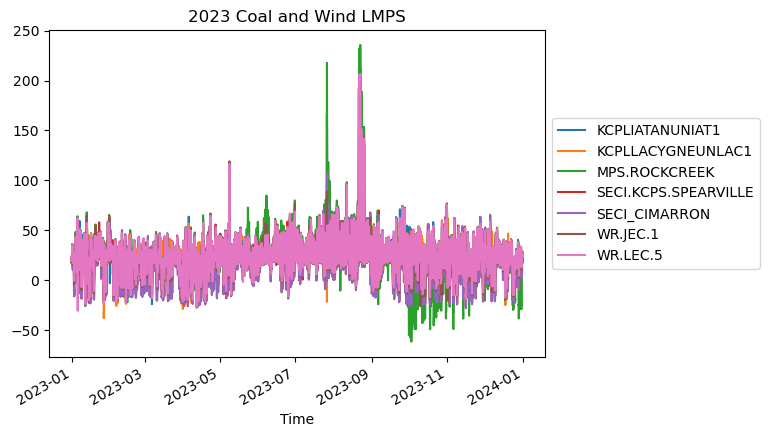

In [4]:
ax = df.plot()
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("2023 Coal and Wind LMPS")
plt.show()

What stands out immediedtly are the big price speaks in the summer, and the increase in negative price volatility in the fall
Additionally, there seems to be a general lift in prices from May through August. 

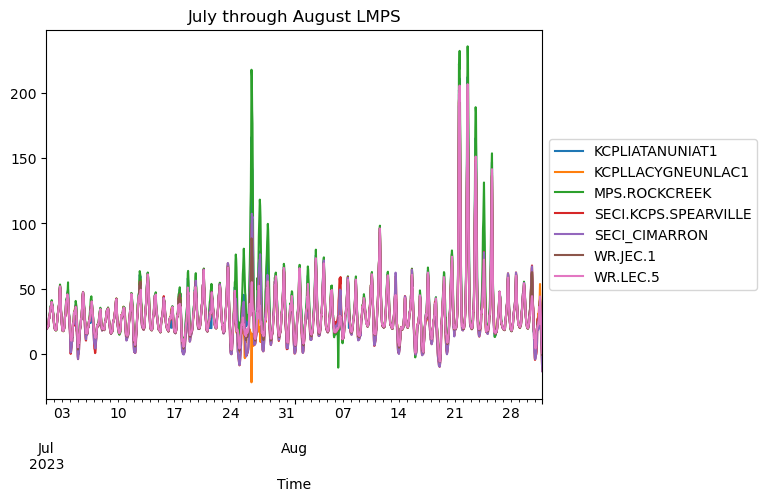

In [5]:
ax = df.loc["2023-07-01":"2023-08-31"].plot()
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("July through August LMPS")
plt.show()

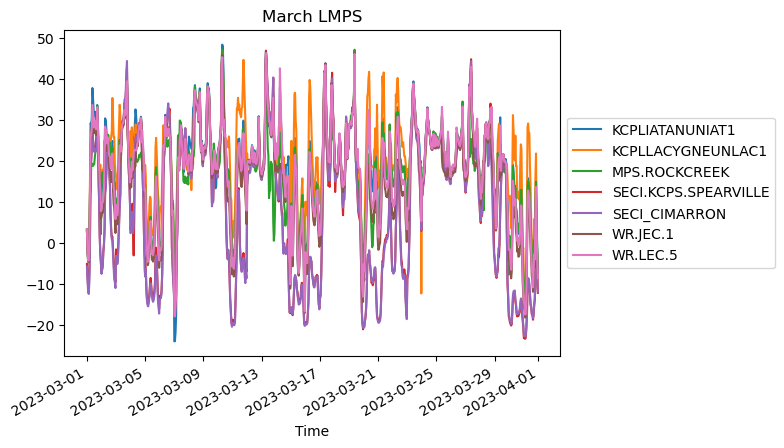

In [6]:
ax = df.loc["2023-03-01":"2023-03-31"].plot()
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
ax.set_title("March LMPS")
plt.show()

In [7]:
coalgens = ["KCPLIATANUNIAT1", "KCPLLACYGNEUNLAC1", "WR.JEC.1", "WR.LEC.5"]
windgens = ["MPS.ROCKCREEK", "SECI.KCPS.SPEARVILLE", "SECI_CIMARRON"]

NameError: name 'axs' is not defined

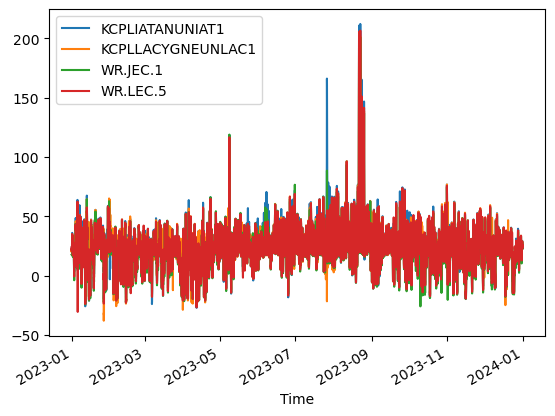

In [8]:
#TODO: probably a cleaner way to set up these graphs 
axs[0]=df[coalgens].plot()
axs[1]=df[windgens].plot()
axs[0].legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title("Coal Gen LMPS")
axs[1].legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title("Wind Gen LMPS")
plt.show()

With one year it is hard to tell if there is an overall trend in the prices
Seasonal-both the price level and the volatility in prices show seasonal patters


### Seasonal Plots
Stacking the weeks

In [6]:
df['DayOfWeek']=df.index.day_name()
df['TimeOfDay']=df.index.time
df['WekOfYear']= df.index.isocalendar().week
df['DayTime']= df.index.strftime('%A %H:%M')

In [7]:
df.head()

,KCPLIATANUNIAT1,KCPLLACYGNEUNLAC1,MPS.ROCKCREEK,SECI.KCPS.SPEARVILLE,SECI_CIMARRON,WR.JEC.1,WR.LEC.5,DayOfWeek,TimeOfDay,WekOfYear,DayTime
Time,,,,,,,,,,,
2023-01-01 00:00:00,23.1615,22.2436,22.8559,18.0405,17.3592,17.6536,24.0183,Sunday,00:00:00,52,Sunday 00:00
2023-01-01 01:00:00,20.5651,19.7729,20.4925,17.3628,17.1675,17.5015,20.8391,Sunday,01:00:00,52,Sunday 01:00
2023-01-01 02:00:00,22.1197,21.1474,21.9965,18.7383,18.5753,17.5991,22.7795,Sunday,02:00:00,52,Sunday 02:00
2023-01-01 03:00:00,21.1908,20.2595,21.1168,18.1809,18.0899,17.4774,21.6705,Sunday,03:00:00,52,Sunday 03:00
2023-01-01 04:00:00,21.9438,20.9770,21.7675,18.8693,18.7861,17.4918,22.6176,Sunday,04:00:00,52,Sunday 04:00


In [ ]:
ticksdays =[0]+[((24*i)-1) for i in range (1,7)]

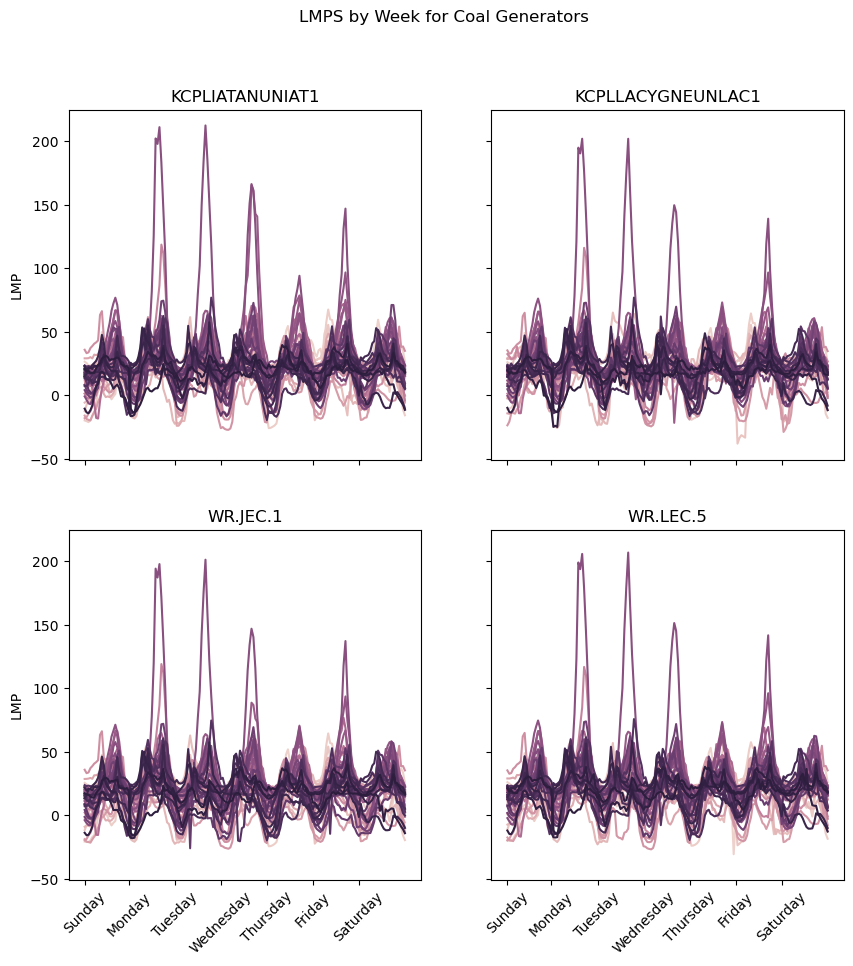

In [34]:
#Coal Gens
coalgens = ["KCPLIATANUNIAT1", "KCPLLACYGNEUNLAC1", "WR.JEC.1", "WR.LEC.5"]
unique_days=df['DayOfWeek'].unique()
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))
fig.suptitle('LMPS by Week for Coal Generators')
for gen,axs in zip(coalgens, fig.get_axes()):
    sns.lineplot(data=df, x='DayTime', y=gen, hue='WekOfYear', errorbar=None, legend=False, ax = axs)
    axs.set_xticks(ticks=ticksdays, labels=unique_days, rotation=45)
    axs.set_title(gen)

for ax in fig.get_axes():
    ax.set(xlabel='', ylabel='LMP')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in fig.get_axes():
    ax.label_outer()


Observations: prices drop off in the overnight hours, and spike in the morning and afternoon. There are negative prices almost exclusivly at night. Large spikes on Monday, Tuesday, and Friday. There is some varince in prices. spread of the prices over the weeks. but they follow a closesly grouped pattern of movement.

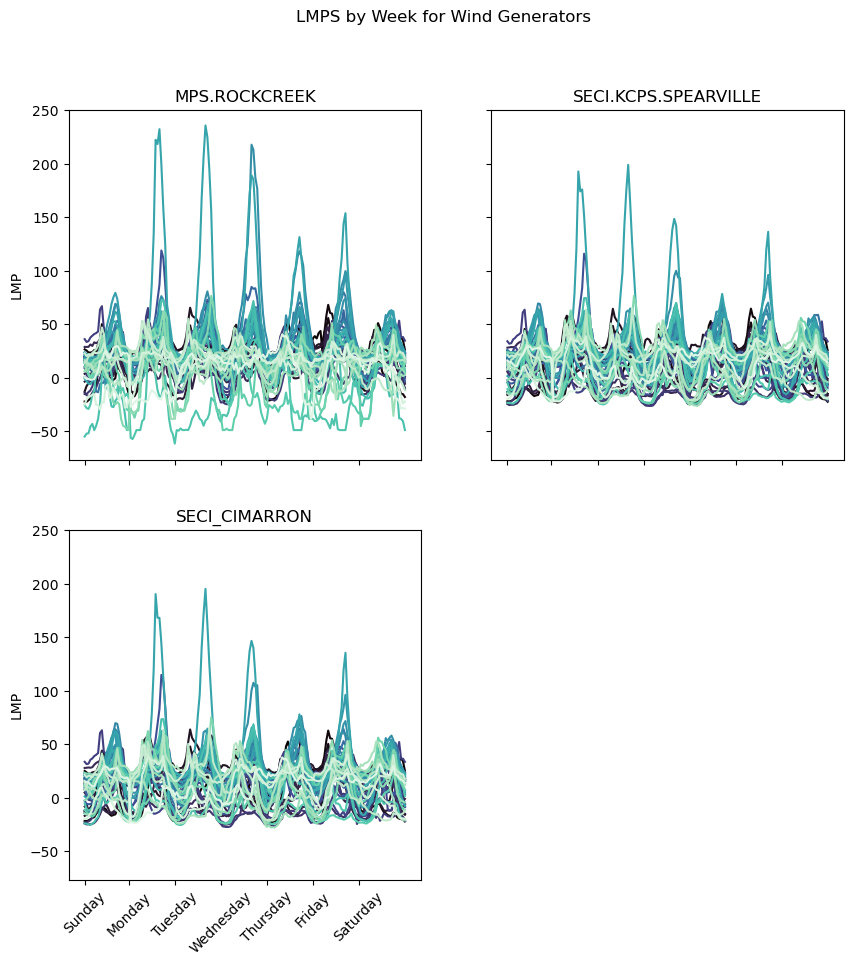

In [35]:
#Wind Gens
windgens = ["MPS.ROCKCREEK", "SECI.KCPS.SPEARVILLE", "SECI_CIMARRON"]
unique_days=df['DayOfWeek'].unique()
fig, axes = plt.subplots(2, 2, sharex=True, sharey= True, figsize=(10,10))
fig.suptitle('LMPS by Week for Wind Generators')
for gen,axs in zip(windgens, fig.get_axes()):
    sns.lineplot(data=df, x='DayTime', y=gen, hue='WekOfYear', errorbar=None, legend=False, ax = axs, palette= "mako" )
    axs.set_xticks(ticks=ticksdays, labels=unique_days, rotation=45)
    axs.set_title(gen)

axes[1,1].axis("off")

for ax in fig.get_axes():
    ax.set(xlabel='', ylabel='LMP')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in fig.get_axes():
   # ax.label_outer()

Observations: Larger swings in day night pricing when compared to the coal geneartors. Across the weeks there is more variance, the prices are less tightly grouped. This could indicate large pricing trends depending on the season. Which would align the assumption that fall and spring have the most hours of wind generation. More frequent and deeper negative price trends. A similar pattern of large spikes on Monday Tuesday, Wednesday, and Friday. 